In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import seaborn as sns; sns.set()

In [2]:
rundf = pd.read_csv('readRunResults1k_withControl_plusHMlog.csv',sep=',')

In [4]:
rundf.describe()

,ticks,totalInfected&Deceased
count,1000.000000,1000.000000
mean,196.973000,416.984000
std,131.177696,462.939468
min,12.000000,2.000000
25%,89.750000,20.000000
50%,154.000000,219.000000
75%,298.000000,778.750000
max,611.000000,1916.000000


In [7]:
%%capture
hist = plt.hist2d(x=rundf['ticks'], y=rundf['totalInfected&Deceased'], bins=30,
                  range=[[0, 700], [0, 3600]])

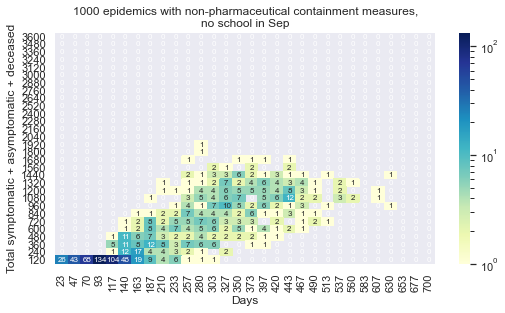

In [8]:
lognorm = LogNorm(vmin=1.0, vmax=np.amax(hist[0]))
plt.figure(figsize=(8.5,4.25))
ax = sns.heatmap(
    np.flip(np.transpose(hist[0]),0), 
    #robust=True, 
    norm=lognorm,
    cmap='YlGnBu',
    annot=True, fmt='.0f',
    xticklabels=np.round(hist[1][1:],0).astype(int),
    yticklabels=np.flip(hist[2][1:],0).astype(int),
    annot_kws={"size":8}
)

plt.xlabel("Days")
plt.ylabel("Total symptomatic + asymptomatic + deceased")

plt.title('1000 epidemics with non-pharmaceutical containment measures,\nno school in Sep')

plt.show()